In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
btc_usd = pd.read_csv("/content/BTC-USD(full).csv")


In [ ]:
date_btc_usd = []
for d in btc_usd['Date']:
  if d.split('-')[0] in date_btc_usd:
    date_btc_usd.append('')
  else:
    date_btc_usd.append(d.split('-')[0])

Text(0.5, 1.0, 'Bitcoin full')

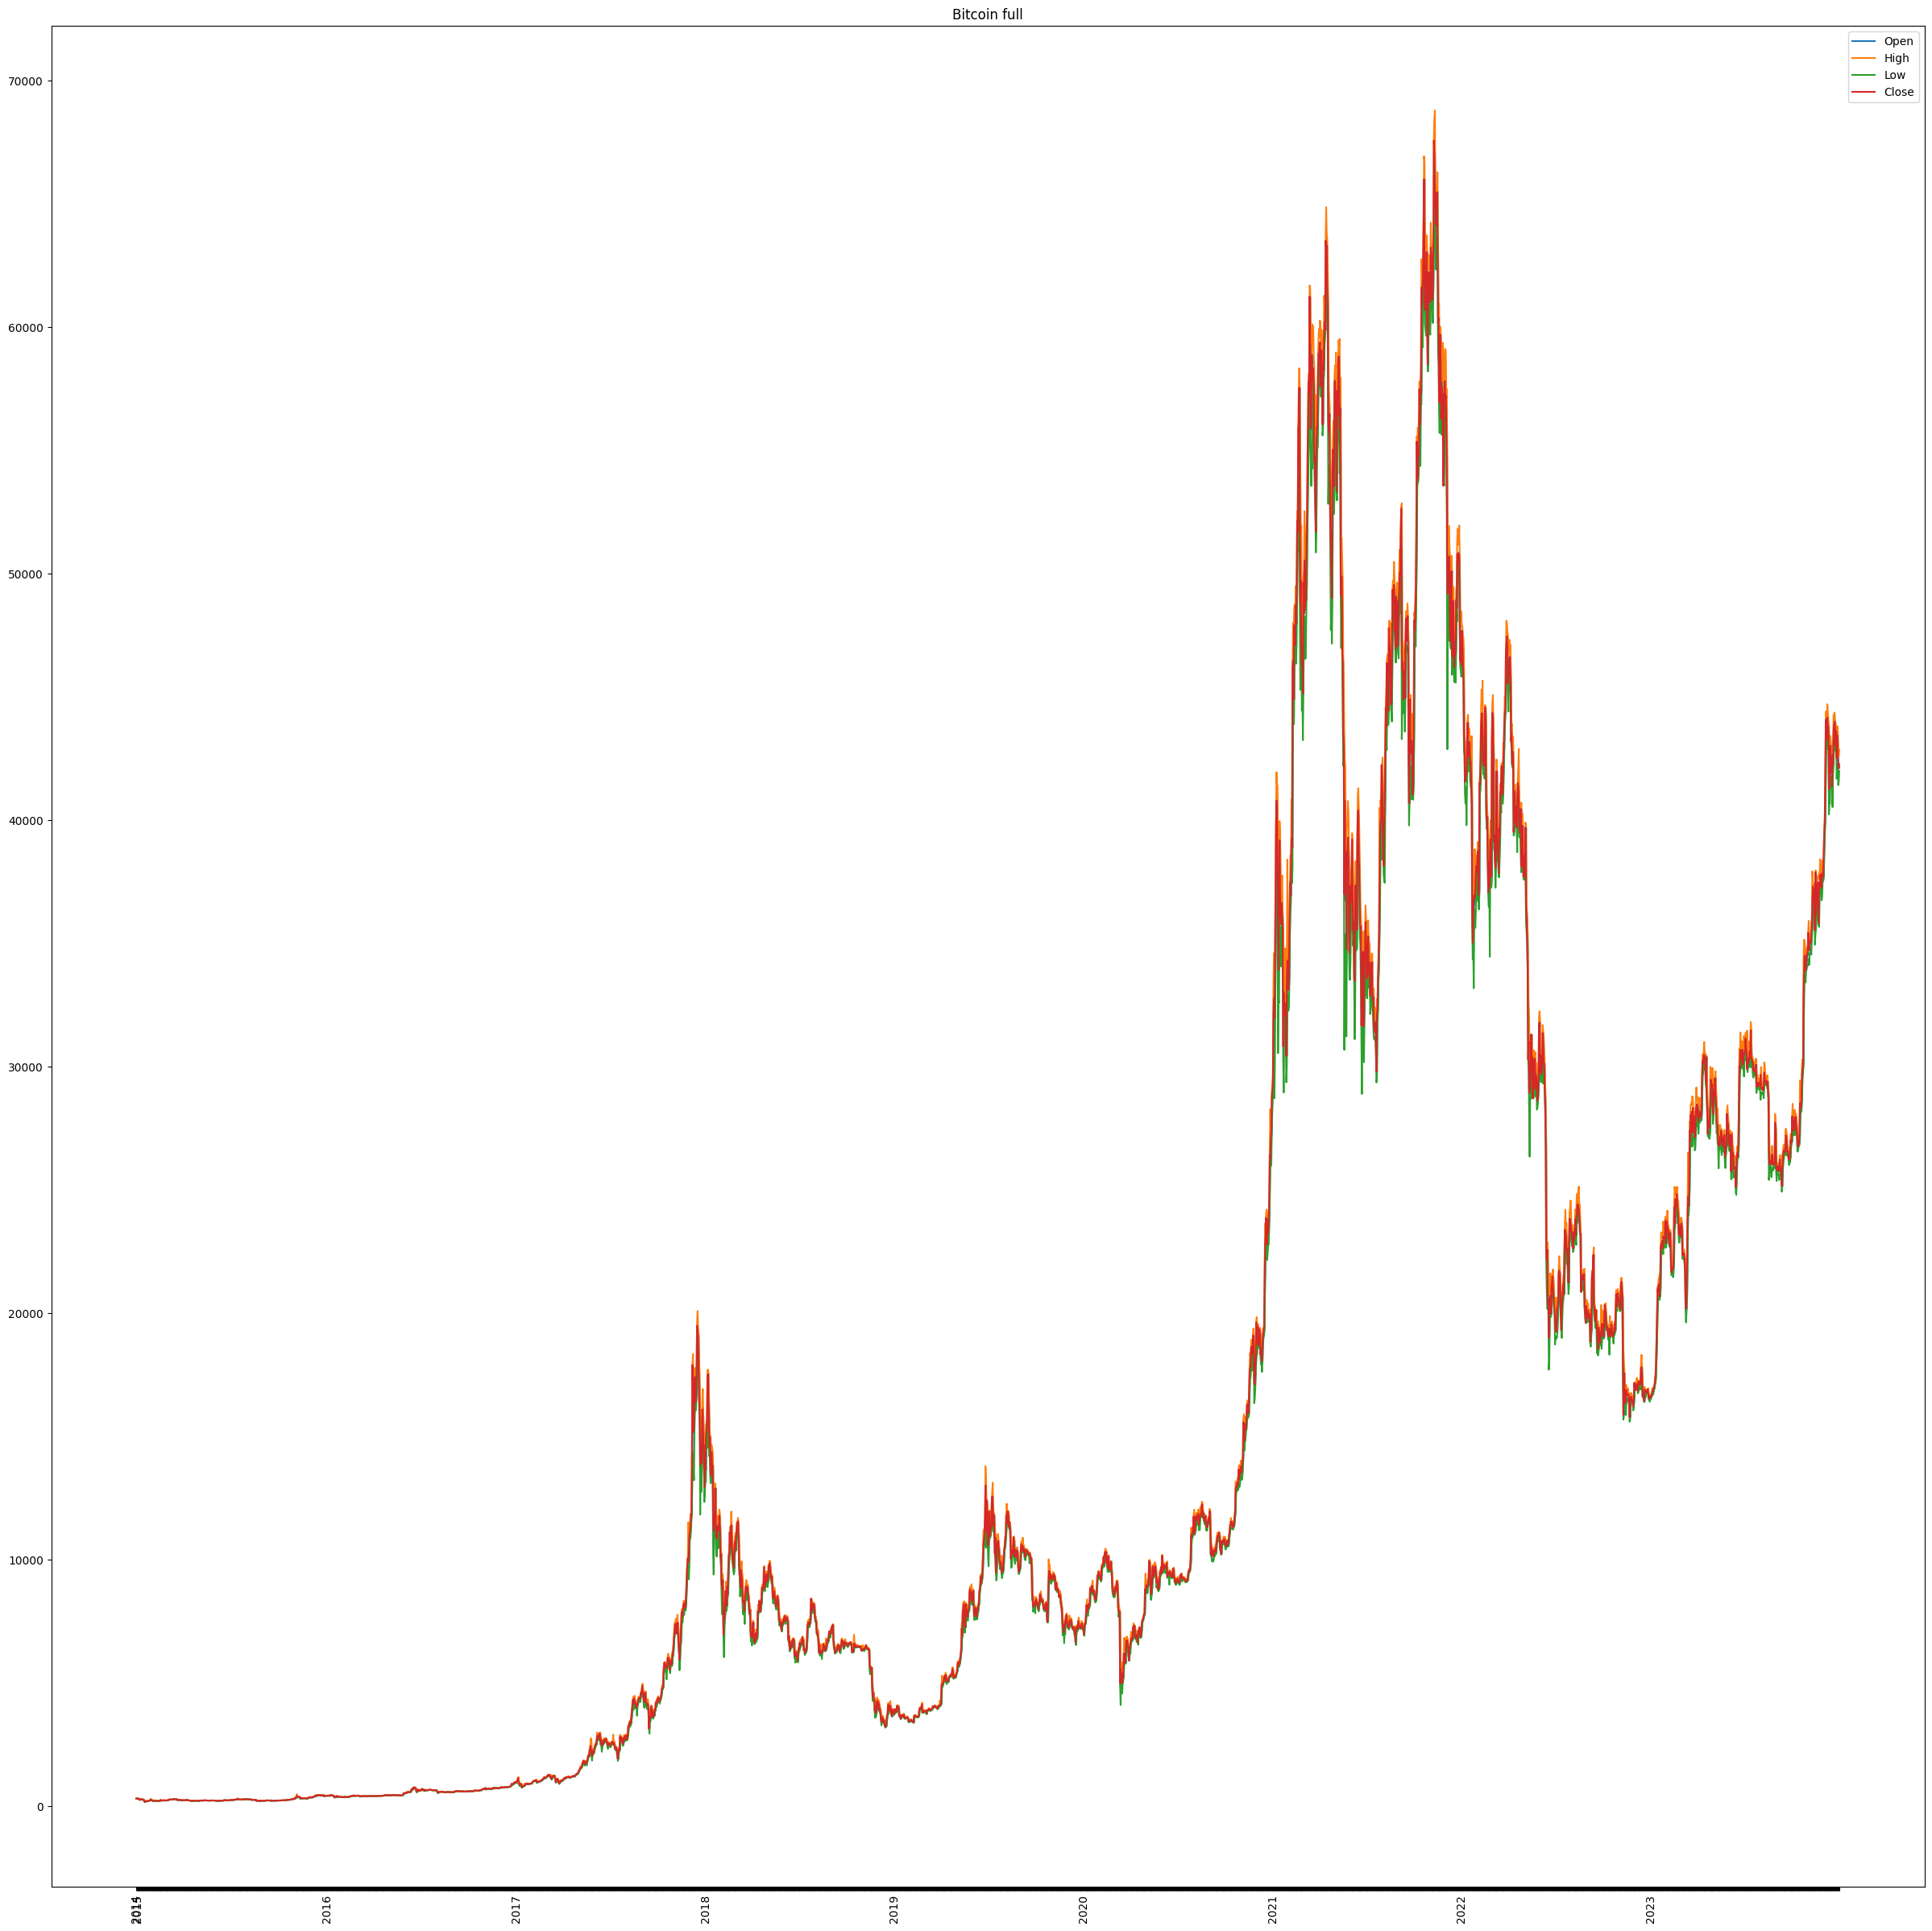

In [ ]:
plt.figure(figsize=[30,30])
plt.plot(btc_usd['Date'],btc_usd['Open'])
plt.plot(btc_usd['Date'],btc_usd['High'])
plt.plot(btc_usd['Date'],btc_usd['Low'])
plt.plot(btc_usd['Date'],btc_usd['Close'])
plt.xticks(btc_usd['Date'], date_btc_usd, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Bitcoin full')

Text(0.5, 1.0, 'Bitcoin Close')

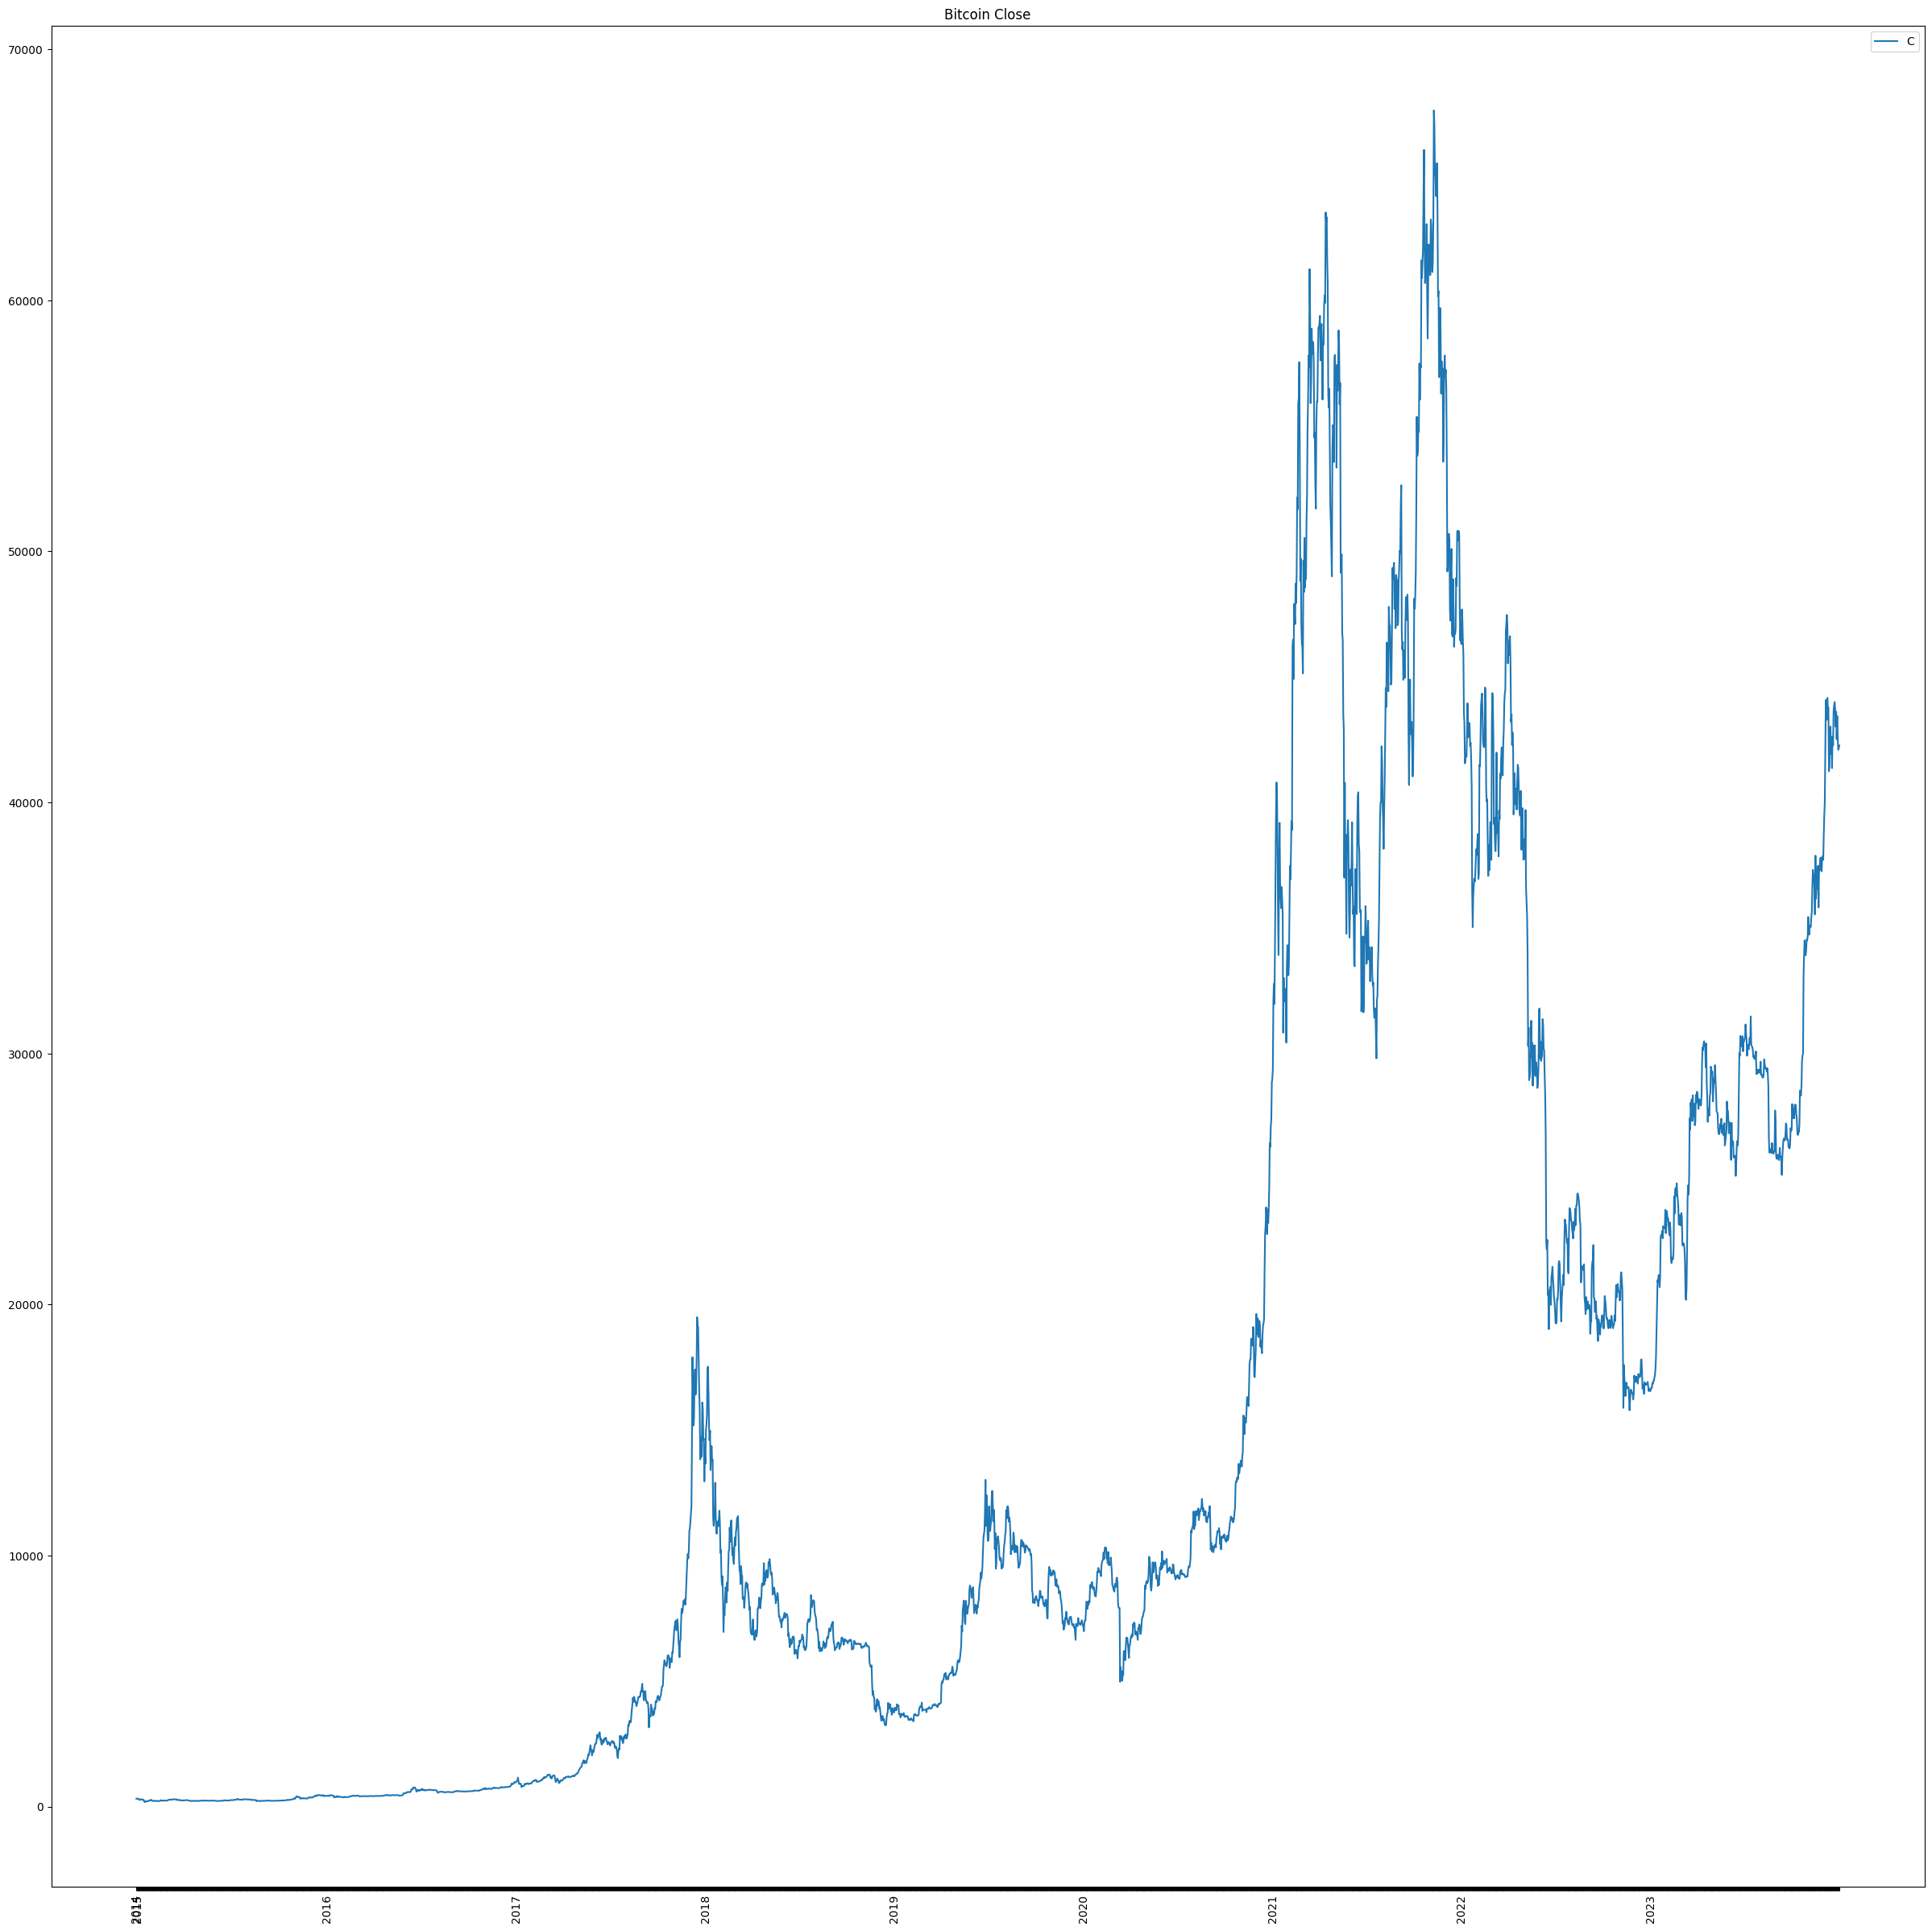

In [ ]:
plt.figure(figsize=[30,30])
plt.plot(btc_usd['Date'],btc_usd['Close'])
plt.xticks(btc_usd['Date'], date_btc_usd, rotation='vertical')
plt.legend('Close')
plt.title("Bitcoin Close")

In [ ]:
df = btc_usd
df_close=df[['Date','Close']]
df_close

,Date,Close
0,2014-12-29,312.670013
1,2014-12-30,310.737000
2,2014-12-31,320.192993
3,2015-01-01,314.248993
4,2015-01-02,315.032013
...,...,...
3285,2023-12-27,43442.855469
3286,2023-12-28,42627.855469
3287,2023-12-29,42099.402344
3288,2023-12-30,42156.902344


In [ ]:
import numpy as np
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
df1 = data.values#close values
# Get the number of rows to train the model on
training_data_len=int(len(df1)*0.95)
test_size=len(df1)-training_data_len
train_data,test_data=df1[0:training_data_len,:],df1[training_data_len:len(df1),:1]

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df1).reshape(-1,1))

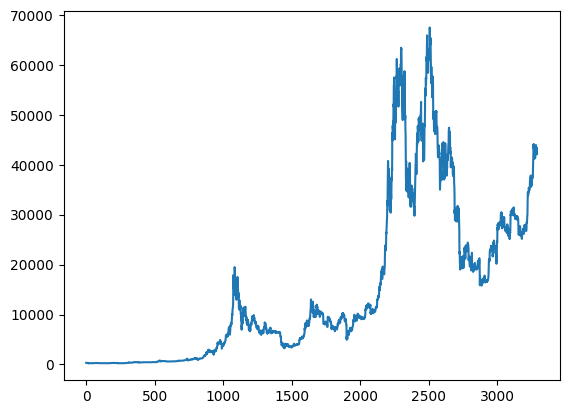

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(df1, time_step=1):
	dataX, dataY = [], []
	for i in range(len(df1)-time_step-1):
		a = df1[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(df1[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
"""
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming 'df2' is your DataFrame and 'n_steps' is the number of steps in your time series
n_steps = 1458  # Number of days in the cycle
n_future = 1458  # Number of days to predict into the future

# Prepare the dataset
def create_dataset(df, n_steps, n_future):
    X, y = [], []
    for i in range(len(df) - n_steps - n_future + 1):  # Ensure there are 'n_future' elements left
        X.append(df[i:i+n_steps])
        y.append(df[i+n_steps:i+n_steps+n_future])
    return np.array(X), np.array(y)

# Create the LSTM model
def create_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(n_future))
    model.compile(optimizer='adam', loss='mse')
    return model

# Reshape the data
# Reshape the data
n_features = 1  # Number of features in your dataset (e.g., 'Close' price)
X, y = create_dataset(df2, n_steps, n_future)  # Pass 'n_future' as well
X = X.reshape((X.shape[0], X.shape[1], n_features))


# Train the model
model = create_model(n_steps, n_features)
model.fit(X, y, epochs=50, verbose=0)

# Make predictions
x_input = df2[-n_steps:]  # Last 'n_steps' data
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

# 'yhat' now contains the predicted prices for the next 'n_future' days
"""

"\nimport numpy as np\nfrom keras.models import Sequential\nfrom keras.layers import Dense, LSTM\n\n# Assuming 'df2' is your DataFrame and 'n_steps' is the number of steps in your time series\nn_steps = 1458  # Number of days in the cycle\nn_future = 1458  # Number of days to predict into the future\n\n# Prepare the dataset\ndef create_dataset(df, n_steps, n_future):\n    X, y = [], []\n    for i in range(len(df) - n_steps - n_future + 1):  # Ensure there are 'n_future' elements left\n        X.append(df[i:i+n_steps])\n        y.append(df[i+n_steps:i+n_steps+n_future])\n    return np.array(X), np.array(y)\n\n# Create the LSTM model\ndef create_model(n_steps, n_features):\n    model = Sequential()\n    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))\n    model.add(LSTM(64, activation='relu'))\n    model.add(Dense(n_future))\n    model.compile(optimizer='adam', loss='mse')\n    return model\n\n# Reshape the data\n# Reshape the data\nn_fea

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = df2[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 100:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00199688, 0.00196819, 0.00210851, 0.00202031, 0.00203193,
       0.00152813, 0.00127754, 0.00143008, 0.00160392, 0.00172483,
       0.00156177, 0.00166652, 0.00143485, 0.00129928, 0.00133098,
       0.00070869, 0.        , 0.00047101, 0.00044509, 0.00031395,
       0.00047836, 0.00054546, 0.00049284, 0.00072407, 0.00082066,
       0.00081284, 0.00103495, 0.00112207, 0.00141522, 0.00126686,
       0.00082821, 0.00082224, 0.00071706, 0.00058409, 0.00072518,
       0.00089223, 0.00072957, 0.00072341, 0.00057885, 0.00065535,
       0.00073678, 0.00067235, 0.00062335, 0.00061933, 0.00060963,
       0.0006479 , 0.00085065, 0.00117554, 0.00084171, 0.00082714,
       0.00097208, 0.00086399, 0.00092271, 0.00097458, 0.00098579,
       0.00085881, 0.00090206, 0.00089974, 0.00088096, 0.00086547,
       0.0011237 , 0.00113016, 0.00121829, 0.00144782, 0.00153733,
       0.00140957, 0.00145536, 0.00140409, 0.00145659, 0.0014283 ,
       0.00165464, 0.00168659, 0.00175513, 0.00172508, 0.0015

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = df2[training_data_len - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = df1[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
48/48 [==============================] - 27s 337ms/step - loss: 0.0078
Epoch 2/100
48/48 [==============================] - 13s 265ms/step - loss: 6.9746e-04
Epoch 3/100
48/48 [==============================] - 13s 261ms/step - loss: 6.9946e-04
Epoch 4/100
48/48 [==============================] - 13s 266ms/step - loss: 6.1363e-04
Epoch 5/100
48/48 [==============================] - 12s 259ms/step - loss: 6.0164e-04
Epoch 6/100
48/48 [==============================] - 13s 261ms/step - loss: 5.5830e-04
Epoch 7/100
48/48 [==============================] - 13s 264ms/step - loss: 4.9840e-04
Epoch 8/100
48/48 [==============================] - 13s 267ms/step - loss: 4.7164e-04
Epoch 9/100
48/48 [==============================] - 13s 278ms/step - loss: 4.6893e-04
Epoch 10/100
48/48 [==============================] - 14s 293ms/step - loss: 4.5024e-04
Epoch 11/100
48/48 [==============================] - 13s 264ms/step - loss: 4.7583e-04
Epoch 12/100
48/48 [=========================

In [ ]:
"""from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, batch_size=64, epochs=100)
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)"""


"from keras.models import Sequential\nfrom keras.layers import Dense, LSTM\n\n# Build the LSTM model\nmodel = Sequential()\nmodel.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))\nmodel.add(LSTM(64, return_sequences=False))\nmodel.add(Dense(25))\nmodel.add(Dense(1))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared_error')\n\n# Train the model\n#model.fit(X_train, y_train, batch_size=64, epochs=100)\nmodel.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)"

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 50ms/step


774.4315311707988

<ipython-input-16-ec3f6a3c2e71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


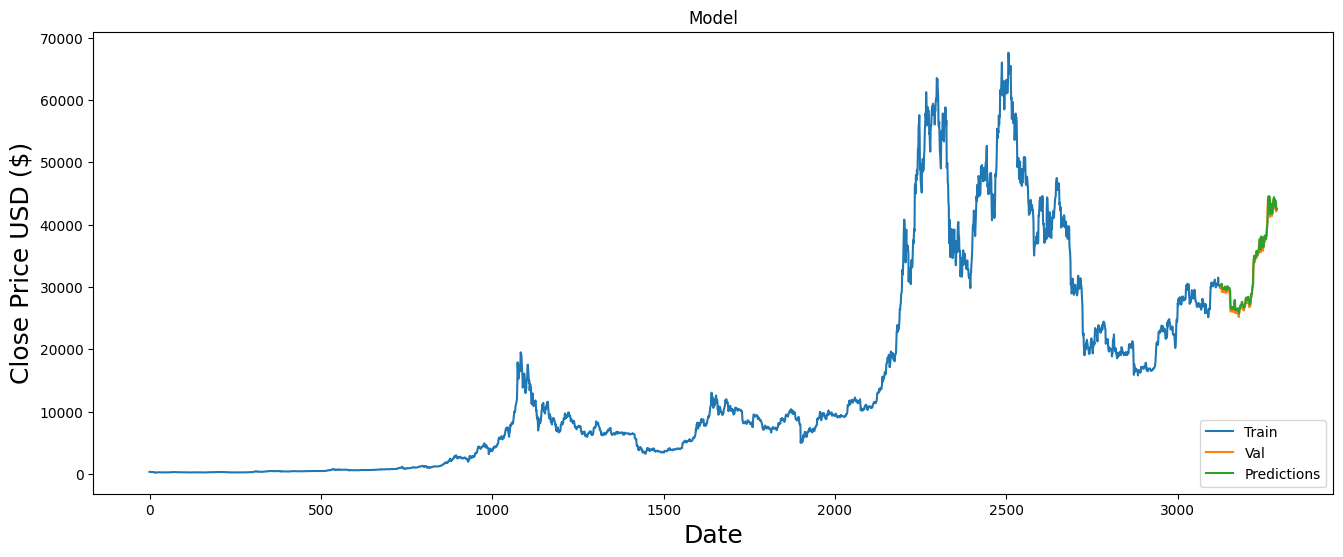

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
3125,29792.015625,30327.080078
3126,29908.744141,30230.091797
3127,29771.802734,30318.267578
3128,30084.539063,30219.849609
3129,29176.916016,30475.064453
...,...,...
3285,43442.855469,42893.667969
3286,42627.855469,43754.027344
3287,42099.402344,42992.296875
3288,42156.902344,42452.789062


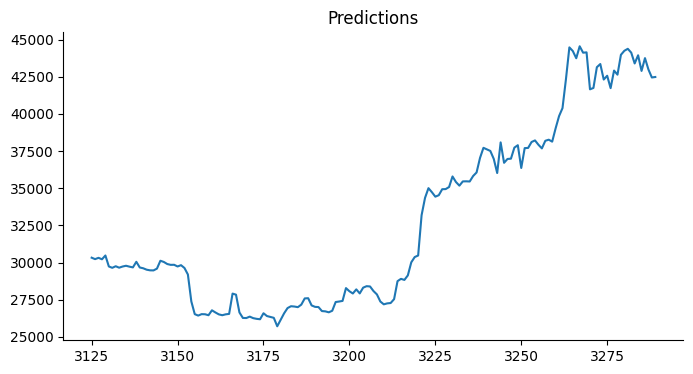

In [ ]:
# @title Predictions

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

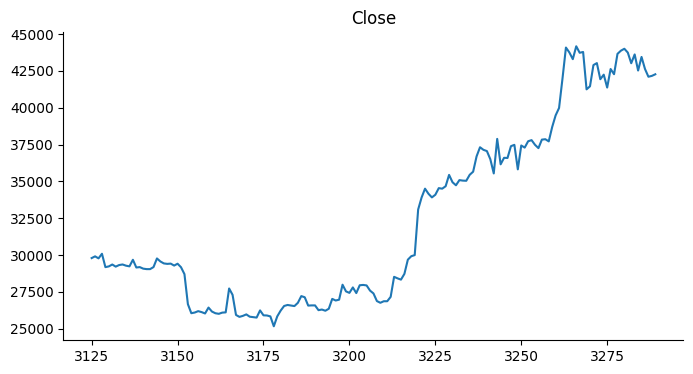

In [ ]:
# @title Close

from matplotlib import pyplot as plt
valid['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
len(test_data)

265

In [ ]:
x_input=test_data[1:].reshape(1,-1)
x_input.shape
#1151

(1, 264)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.44459885062510596,
 0.4484572656864701,
 0.44974283404876575,
 0.4472616604595279,
 0.4472150558532821,
 0.4343002760389006,
 0.44843480388745066,
 0.42506482555637753,
 0.4165071416722469,
 0.402126722348995,
 0.4101486851175915,
 0.4067932983882757,
 0.4058132394559461,
 0.4174213802912885,
 0.4191294333191707,
 0.4347267893309299,
 0.43274536900065386,
 0.4313835174768911,
 0.4316850272615235,
 0.4142156615810789,
 0.4229555323663074,
 0.42778974586984553,
 0.42543627122406835,
 0.43562601478570584,
 0.4262808058089251,
 0.41960840578732006,
 0.4083200919550715,
 0.4077933265810037,
 0.4072439834686406,
 0.3980292847958208,
 0.39512377161645595,
 0.3948134510255814,
 0.39698830366927845,
 0.40087700591883496,
 0.3985614409974982,
 0.40393552015261086,
 0.39552767820391993,
 0.39638716800566326,
 0.39994053737932583,
 0.3943645338967511,
 0.3958106388915391,
 0.4013671948033591,
 0.3881467606386263,
 0.39024486639343087,
 0.3938520571295411,
 0.3960640369483738,
 0.414127785233978

In [ ]:
"""
from numpy import array

lst_output = []
n_steps = 181
i = 0

while i < 30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)

"""

'\nfrom numpy import array\n\nlst_output = []\nn_steps = 181\ni = 0\n\nwhile i < 30:\n    if len(temp_input) >= n_steps:\n        x_input = np.array(temp_input[-n_steps:])\n        x_input = x_input.reshape((1, n_steps, 1))\n        yhat = model.predict(x_input, verbose=0)\n\n        temp_input.extend(yhat[0].tolist())\n        lst_output.extend(yhat.tolist())\n        i = i + 1\n    else:\n        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))\n        yhat = model.predict(x_input, verbose=0)\n\n        temp_input.extend(yhat[0].tolist())\n        lst_output.extend(yhat.tolist())\n        i = i + 1\n\nprint(lst_output)\n\n'

In [ ]:
i = 0
lst_output = []
n_steps = len(df2)  # Adjusted to use entire dataset
while i < 120:  # Changed from 30 to 120 for forecasting next 120 days
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)




[[0.629448413848877], [0.6344015002250671], [0.6395359039306641], [0.6448103189468384], [0.6501728892326355], [0.65557861328125], [0.6609910726547241], [0.666380763053894], [0.6717244386672974], [0.6770040988922119], [0.6822064518928528], [0.6873224973678589], [0.6923465132713318], [0.6972754001617432], [0.7021085619926453], [0.7068464756011963], [0.71149080991745], [0.7160434126853943], [0.7205066680908203], [0.7248824834823608], [0.729172945022583], [0.7333796620368958], [0.7375038862228394], [0.7415465712547302], [0.7455083727836609], [0.7493897676467896], [0.7531907558441162], [0.7569115161895752], [0.760551929473877], [0.7641120553016663], [0.767591655254364], [0.7709908485412598], [0.774309515953064], [0.7775477170944214], [0.7807058691978455], [0.7837842702865601], [0.7867833375930786], [0.7897035479545593], [0.792545735836029], [0.7953103184700012], [0.7979984879493713], [0.8006110191345215], [0.8031488656997681], [0.8056132197380066], [0.8080053329467773], [0.810326337814331],

In [ ]:
day_new=np.arange(1,len(df2)+1)
day_pred=np.arange(len(df2)+1,len(df2)+121)



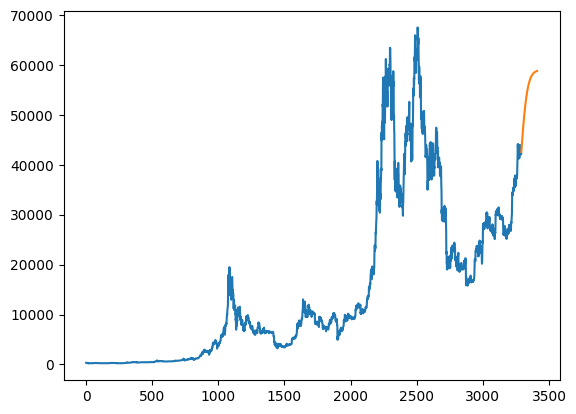

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2))
plt.plot(day_pred,scaler.inverse_transform(np.array(lst_output).reshape(-1,1)))



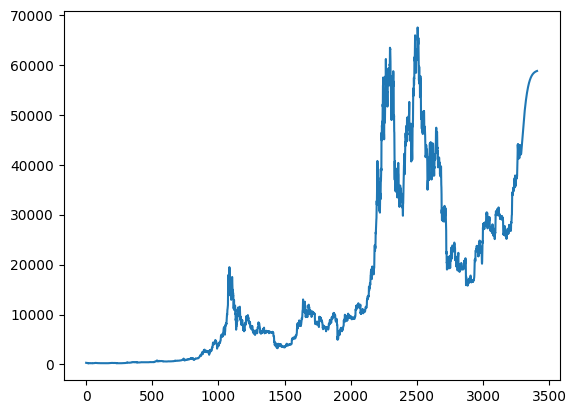

In [ ]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(scaler.inverse_transform(np.array(df3).reshape(-1,1)))

In [ ]:
lst_output

[[0.629448413848877],
 [0.6344015002250671],
 [0.6395359039306641],
 [0.6448103189468384],
 [0.6501728892326355],
 [0.65557861328125],
 [0.6609910726547241],
 [0.666380763053894],
 [0.6717244386672974],
 [0.6770040988922119],
 [0.6822064518928528],
 [0.6873224973678589],
 [0.6923465132713318],
 [0.6972754001617432],
 [0.7021085619926453],
 [0.7068464756011963],
 [0.71149080991745],
 [0.7160434126853943],
 [0.7205066680908203],
 [0.7248824834823608],
 [0.729172945022583],
 [0.7333796620368958],
 [0.7375038862228394],
 [0.7415465712547302],
 [0.7455083727836609],
 [0.7493897676467896],
 [0.7531907558441162],
 [0.7569115161895752],
 [0.760551929473877],
 [0.7641120553016663],
 [0.767591655254364],
 [0.7709908485412598],
 [0.774309515953064],
 [0.7775477170944214],
 [0.7807058691978455],
 [0.7837842702865601],
 [0.7867833375930786],
 [0.7897035479545593],
 [0.792545735836029],
 [0.7953103184700012],
 [0.7979984879493713],
 [0.8006110191345215],
 [0.8031488656997681],
 [0.8056132197380066],

In [ ]:
"""
##forecasting next 30 days based on 100 days historical data
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
"""

'\n##forecasting next 30 days based on 100 days historical data\nday_new=np.arange(1,101)\nday_pred=np.arange(101,131)\n'

In [ ]:
"""import matplotlib.pyplot as plt"""

'import matplotlib.pyplot as plt'

In [ ]:
#len(df2)

In [ ]:
"""
# Print the length of the original DataFrame and the range being selected
print("Original DataFrame length:", len(df2))
print("Selected range length:", len(df2[3190:]))

# Print the entire DataFrame to inspect its contents
print(df2)
"""


'\n# Print the length of the original DataFrame and the range being selected\nprint("Original DataFrame length:", len(df2))\nprint("Selected range length:", len(df2[3190:]))\n\n# Print the entire DataFrame to inspect its contents\nprint(df2)\n'

In [ ]:
"""
plt.plot(day_new,scaler.inverse_transform(df2[3190:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
"""

'\nplt.plot(day_new,scaler.inverse_transform(df2[3190:]))\nplt.plot(day_pred,scaler.inverse_transform(lst_output))\n'

In [ ]:
#len(df2)

In [ ]:
"""
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[3190:])
#3190
"""

'\ndf3=df2.tolist()\ndf3.extend(lst_output)\nplt.plot(df3[3190:])\n#3190\n'

In [ ]:
#df3=scaler.inverse_transform(df3).tolist()

In [ ]:
#plt.plot(df3)

In [ ]:
#lst_output

In [ ]:
"""
import numpy as np

# Step 1: Calculate Daily Returns
predicted_prices = scaler.inverse_transform(lst_output)
daily_returns = np.diff(predicted_prices, axis=0) / predicted_prices[:-1]

# Step 2: Calculate Annualized Returns
annualized_returns = np.mean(daily_returns) * 252  # Assuming 252 trading days in a year

# Step 3: Calculate Volatility
volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized volatility

# Step 4: Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility

# Step 5: Calculate Maximum Drawdown
cum_returns = np.cumprod(1 + daily_returns) - 1
previous_peaks = np.maximum.accumulate(cum_returns)
drawdowns = (cum_returns - previous_peaks) / previous_peaks
max_drawdown = np.min(drawdowns)

# Print the results
print("Annualized Returns:", annualized_returns)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Maximum Drawdown:", max_drawdown)
"""

'\nimport numpy as np\n\n# Step 1: Calculate Daily Returns\npredicted_prices = scaler.inverse_transform(lst_output)\ndaily_returns = np.diff(predicted_prices, axis=0) / predicted_prices[:-1]\n\n# Step 2: Calculate Annualized Returns\nannualized_returns = np.mean(daily_returns) * 252  # Assuming 252 trading days in a year\n\n# Step 3: Calculate Volatility\nvolatility = np.std(daily_returns) * np.sqrt(252)  # Annualized volatility\n\n# Step 4: Calculate Sharpe Ratio\nrisk_free_rate = 0.02  # Assuming a risk-free rate of 2%\nsharpe_ratio = (annualized_returns - risk_free_rate) / volatility\n\n# Step 5: Calculate Maximum Drawdown\ncum_returns = np.cumprod(1 + daily_returns) - 1\nprevious_peaks = np.maximum.accumulate(cum_returns)\ndrawdowns = (cum_returns - previous_peaks) / previous_peaks\nmax_drawdown = np.min(drawdowns)\n\n# Print the results\nprint("Annualized Returns:", annualized_returns)\nprint("Volatility:", volatility)\nprint("Sharpe Ratio:", sharpe_ratio)\nprint("Maximum Drawdown

In [ ]:
predicted_returns = lst_output

In [ ]:
import numpy as np

# Step 1: Calculate Daily Returns
predicted_prices = scaler.inverse_transform(lst_output)
daily_returns = np.diff(predicted_prices, axis=0) / predicted_prices[:-1]

# Step 2: Calculate Annualized Returns
annualized_returns = np.mean(daily_returns) * 252  # Assuming 252 trading days in a year

# Step 3: Calculate Volatility
volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized volatility

# Step 4: Calculate Sharpe Ratio
risk_free_rate = 0.02  # Assuming a risk-free rate of 2%
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility

# Print the Sharpe ratio
print("Sharpe Ratio for the predicted next 30 days:", sharpe_ratio)


Sharpe Ratio for the predicted next 30 days: 16.343202817765295


In [ ]:
"""
# Calculate the percentage change
df['Pct Change'] = df['Close'].pct_change()

# Define the cycle period (in trading days)
cycle_period = 252 * 4  # 252 trading days in a year

# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame()

# Repeat the cycle for the next 4 years
for i in range(cycle_period):
    forecast_df.loc[i, 'Forecast'] = df.iloc[i % len(df)]['Pct Change']

# Convert the percentage changes to price
forecast_df['Forecast'] = (1 + forecast_df['Forecast']).cumprod() * df.iloc[-1]['Close']

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Historical')
plt.plot(pd.date_range(start=df.index[-1], periods=cycle_period, freq='B'), forecast_df['Forecast'], label='Forecast')
plt.legend()
plt.show()
"""

"\n# Calculate the percentage change\ndf['Pct Change'] = df['Close'].pct_change()\n\n# Define the cycle period (in trading days)\ncycle_period = 252 * 4  # 252 trading days in a year\n\n# Create a new DataFrame for the forecast\nforecast_df = pd.DataFrame()\n\n# Repeat the cycle for the next 4 years\nfor i in range(cycle_period):\n    forecast_df.loc[i, 'Forecast'] = df.iloc[i % len(df)]['Pct Change']\n\n# Convert the percentage changes to price\nforecast_df['Forecast'] = (1 + forecast_df['Forecast']).cumprod() * df.iloc[-1]['Close']\n\n# Plot the forecast\nplt.figure(figsize=(12,6))\nplt.plot(df['Close'], label='Historical')\nplt.plot(pd.date_range(start=df.index[-1], periods=cycle_period, freq='B'), forecast_df['Forecast'], label='Forecast')\nplt.legend()\nplt.show()\n"

In [ ]:
"""import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Assuming 'df2' is your DataFrame and 'n_steps' is the number of steps in your time series
n_steps = 1458  # Number of days in the cycle
n_future = 1458  # Number of days to predict into the future

# Prepare the dataset
def create_dataset(df, n_steps):
    X, y = [], []
    for i in range(len(df) - n_steps):
        X.append(df[i:i+n_steps])
        y.append(df[i+n_steps:i+n_steps+n_future])
    return np.array(X), np.array(y)

# Create the LSTM model
def create_model(n_steps, n_features):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(64, activation='relu'))
    model.add(Dense(n_future))
    model.compile(optimizer='adam', loss='mse')
    return model

# Reshape the data
n_features = 1  # Number of features in your dataset (e.g., 'Close' price)
X, y = create_dataset(df2.values, n_steps)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Train the model
model = create_model(n_steps, n_features)
model.fit(X, y, epochs=50, verbose=0)

# Make predictions
x_input = df2.values[-n_steps:]  # Last 'n_steps' data
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

# 'yhat' now contains the predicted prices for the next 'n_future' days
"""

"import numpy as np\nfrom keras.models import Sequential\nfrom keras.layers import Dense, LSTM\n\n# Assuming 'df2' is your DataFrame and 'n_steps' is the number of steps in your time series\nn_steps = 1458  # Number of days in the cycle\nn_future = 1458  # Number of days to predict into the future\n\n# Prepare the dataset\ndef create_dataset(df, n_steps):\n    X, y = [], []\n    for i in range(len(df) - n_steps):\n        X.append(df[i:i+n_steps])\n        y.append(df[i+n_steps:i+n_steps+n_future])\n    return np.array(X), np.array(y)\n\n# Create the LSTM model\ndef create_model(n_steps, n_features):\n    model = Sequential()\n    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))\n    model.add(LSTM(64, activation='relu'))\n    model.add(Dense(n_future))\n    model.compile(optimizer='adam', loss='mse')\n    return model\n\n# Reshape the data\nn_features = 1  # Number of features in your dataset (e.g., 'Close' price)\nX, y = create_dataset

In [ ]:
import numpy as np

# Calculate daily returns
daily_returns = (predicted_prices[1:] / predicted_prices[:-1]) - 1

# Calculate annualized return
annualized_return = np.mean(daily_returns) * 252

# Calculate drawdowns
drawdowns = np.maximum.accumulate(predicted_prices) - predicted_prices

# Calculate maximum drawdown
max_drawdown = np.max(drawdowns)

print(f"Annualized Return: {annualized_return}")
print(f"Maximum Drawdown: {max_drawdown}")


Annualized Return: 0.686125737500054
Maximum Drawdown: 0.0


In [ ]:
# Define your risk management parameters
stop_loss = 0.05  # Stop loss level (5% loss)
risk_reward_ratio = 2.0  # Risk-reward ratio (2:1)

# Calculate the target price for each trade
target_price = predicted_prices * (1 + risk_reward_ratio * stop_loss)

# Create a function to simulate trading with the stop loss and target price
def simulate_trading(prices, stop_loss, target_price):
    capital = 1.0  # Initial capital is 1 BTC
    in_position = False  # Start out not in a position

    for i in range(len(prices)):
        if not in_position:
            # Enter a position if the price is less than the target price
            if prices[i] < target_price[i]:
                in_position = True
        else:
            # Exit the position if the price drops below the stop loss level or rises above the target price
            if prices[i] < prices[i-1] * (1 - stop_loss) or prices[i] > target_price[i]:
                in_position = False

        # Update capital
        if in_position:
            capital *= prices[i] / prices[i-1]

    return capital

# Simulate trading with the predicted prices
final_capital = simulate_trading(predicted_prices, stop_loss, target_price)

print(f"Final capital after trading: {final_capital}")


Final capital after trading: [1.]


In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=31b8f612ce292fc66a02dbb4f1be8acd795bbef3758e1fc20f68cf1eb8b4abd4
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import pandas as pd
import ta

# Assuming 'df3' is your DataFrame with the 'Close' prices
df = pd.DataFrame(df3, columns=['Close'])

# Calculate moving averages
ma_short = df['Close'].rolling(window=20).mean()  # 20-day moving average
ma_long = df['Close'].rolling(window=50).mean()  # 50-day moving average

# Calculate RSI
rsi = ta.momentum.rsi(df['Close'], window=14)  # 14-day RSI


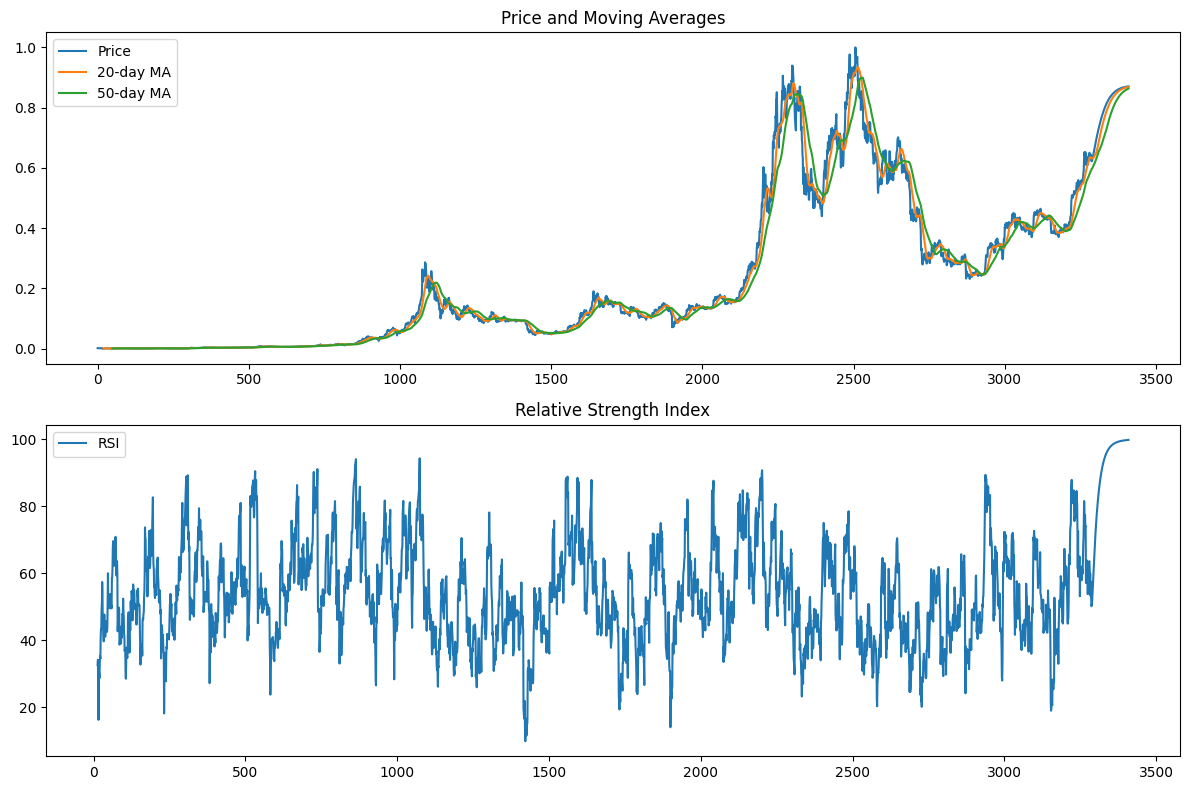

In [ ]:
import matplotlib.pyplot as plt

# Plot the prices, moving averages, and RSI
plt.figure(figsize=(12, 8))

# Subplot for prices and moving averages
plt.subplot(2, 1, 1)
plt.plot(df3, label='Price')
plt.plot(ma_short, label='20-day MA')
plt.plot(ma_long, label='50-day MA')
plt.title('Price and Moving Averages')
plt.legend()

# Subplot for RSI
plt.subplot(2, 1, 2)
plt.plot(rsi, label='RSI')
plt.title('Relative Strength Index')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# history = model.fit(x_train, y_train, epochs=50, verbose=0)

# # Plot the loss curve
# plt.figure(figsize=(10,6))
# plt.plot(history.history['loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()


In [ ]:
pip install --upgrade pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
pip install pep517

In [ ]:
!pip3 install --upgrade pip

In [ ]:
!pip install pyproject-toml

In [ ]:
pip install TA_Lib‑0.4.10‑cp35‑cp35m‑win_amd64.whl

ERROR: TA_Lib‑0.4.10‑cp35‑cp35m‑win_amd64.whl is not a valid wheel filename.


In [ ]:
pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects


In [ ]:
import talib


ModuleNotFoundError: No module named 'talib'

In [ ]:
pip uninstall pip setuptools wheel
